In [4]:
import pandas as pd

# Load the CSV file
file_path = '/mnt/data/Sales Dataset.csv'
sales_df = pd.read_csv("Sales Dataset.csv")

# Display the first few rows of the DataFrame
sales_df.head()


,Unnamed: 0,CustomerID,Age,Gender,Location,ProductCategory,PurchaseDate,PurchaseAmount,PaymentMethod,Quantity,DiscountPercentage,IsReturned,Rating,IsPromotion,CustomerSegment,ShippingDuration,Region,IngestionTimestamp,Source,Month
0,0,1,56.0,Male,Suburb,Clothing,2022-01-01,-100.000000,Debit Card,5,0.300396,False,2,False,New,2.0,South,2024-05-31 11:52:10.267500,System A,1
1,1,2,46.0,Female,Rural,Home Appliances,2022-01-02,999999.000000,Cash,5,0.350433,False,3,False,Returning,4.0,East,2024-05-31 11:52:10.267500,System A,1
2,2,3,NaN,Female,Suburb,Home Appliances,2022-01-03,955.564055,Debit Card,8,0.142603,False,5,False,Returning,5.0,South,2024-05-31 11:52:10.267500,System A,1
3,3,4,60.0,Female,Suburb,Electronics,2022-01-04,527.350833,Cash,9,0.315385,False,4,False,New,NaN,West,2024-05-31 11:52:10.267500,System A,1
4,4,10,25.0,Male,Suburb,Clothing,2022-01-10,306.570021,Credit Card,9,0.227825,False,5,False,Returning,5.0,North,2024-05-31 11:52:10.267500,System A,1


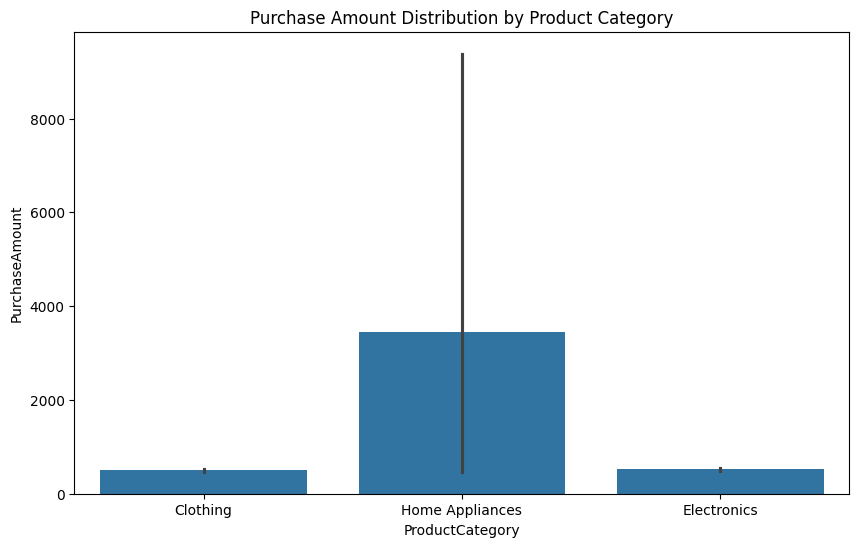

Average Purchase Amount per Product Category:
 ProductCategory
Clothing            504.745259
Electronics         519.531507
Home Appliances    3438.390432
Name: PurchaseAmount, dtype: float64


In [6]:
#problem statement 1

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for distribution of purchase amounts
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCategory', y='PurchaseAmount', data=sales_df)
plt.title('Purchase Amount Distribution by Product Category')
plt.show()

# Average purchase amount per product category
avg_purchase_per_category = sales_df.groupby('ProductCategory')['PurchaseAmount'].mean()
print("Average Purchase Amount per Product Category:\n", avg_purchase_per_category)


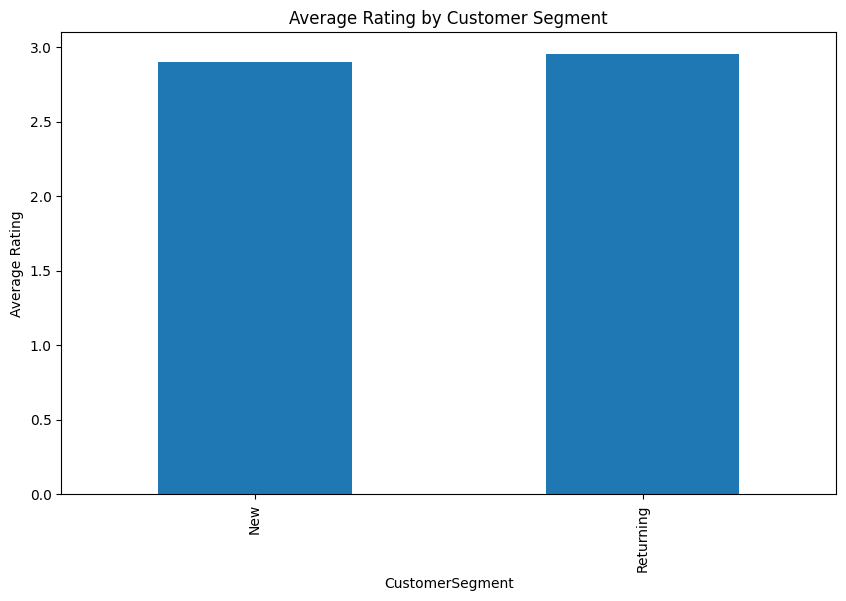

Average Rating per Customer Segment:
 CustomerSegment
New          2.898990
Returning    2.953642
Name: Rating, dtype: float64


In [ ]:
#problem statement 2
# Bar plot for average ratings
avg_rating_per_segment = sales_df.groupby('CustomerSegment')['Rating'].mean()
plt.figure(figsize=(10, 6))
avg_rating_per_segment.plot(kind='bar')
plt.title('Average Rating by Customer Segment')
plt.ylabel('Average Rating')
plt.show()

print("Average Rating per Customer Segment:\n", avg_rating_per_segment)


Correlation matrix:
                      Age  PurchaseAmount
Age             1.000000        0.011542
PurchaseAmount  0.011542        1.000000


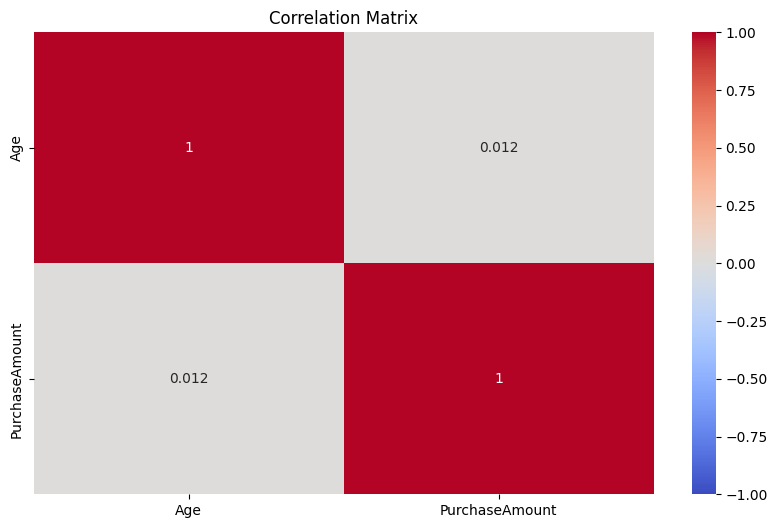

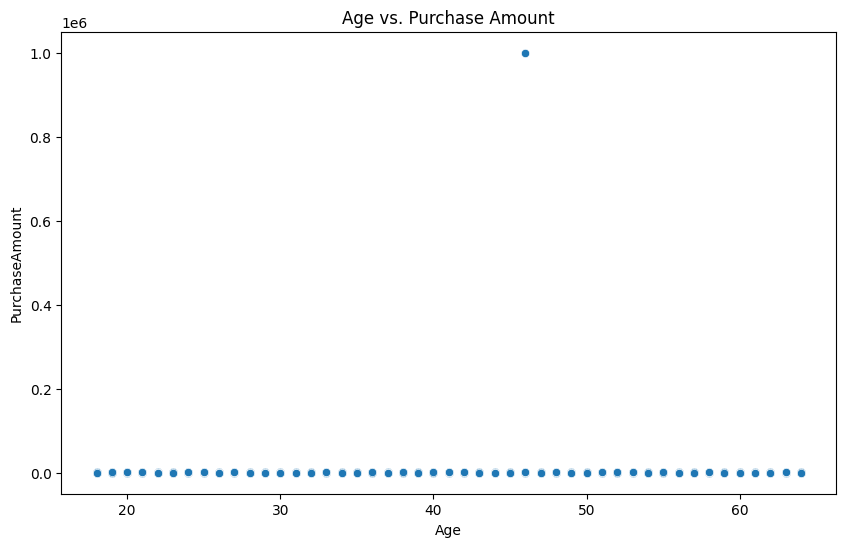

In [ ]:
#problem statement 3
# Correlation matrix
correlation = sales_df[['Age', 'PurchaseAmount']].corr()
print("Correlation matrix:\n", correlation)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PurchaseAmount', data=sales_df)
plt.title('Age vs. Purchase Amount')
plt.show()


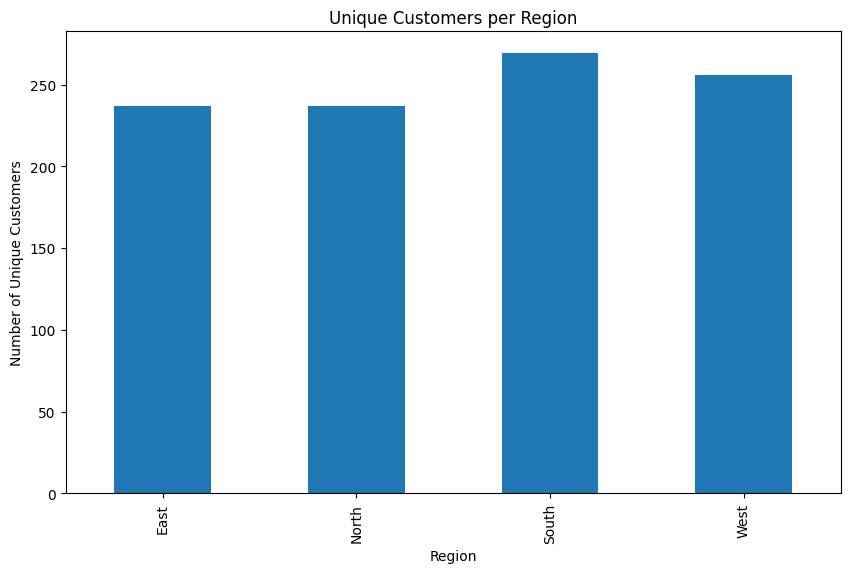

Total number of unique customers: 998


In [ ]:
#problem statement 4
# Number of unique customers per region
unique_customers_per_region = sales_df.groupby('Region')['CustomerID'].nunique()
plt.figure(figsize=(10, 6))
unique_customers_per_region.plot(kind='bar')
plt.title('Unique Customers per Region')
plt.ylabel('Number of Unique Customers')
plt.show()

total_unique_customers = sales_df['CustomerID'].nunique()
print("Total number of unique customers:", total_unique_customers)


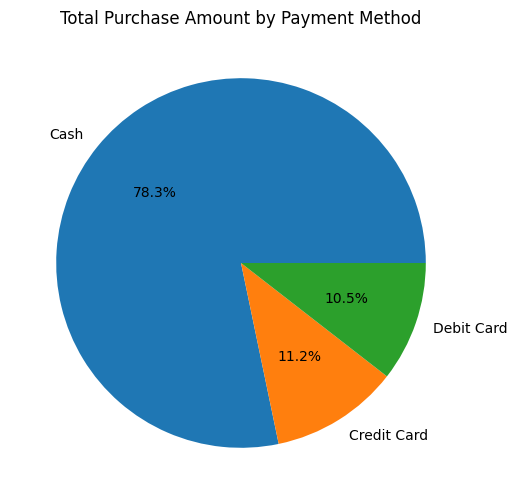

Total Purchase Amount per Payment Method:
 PaymentMethod
Cash           1.175127e+06
Credit Card    1.684361e+05
Debit Card     1.578262e+05
Name: PurchaseAmount, dtype: float64


In [ ]:
#problem statement 5
# Total purchase amount per payment method
total_purchase_per_payment_method = sales_df.groupby('PaymentMethod')['PurchaseAmount'].sum()
plt.figure(figsize=(10, 6))
total_purchase_per_payment_method.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Purchase Amount by Payment Method')
plt.ylabel('')
plt.show()

print("Total Purchase Amount per Payment Method:\n", total_purchase_per_payment_method)


In [10]:
# problem statement 6
!pip install pandas sqlalchemy


In [15]:
import pandas as pd
from sqlalchemy import create_engine

# Step 1: Data Extraction
def extract_data(file_path):
    # Load CSV file into a DataFrame
    df = pd.read_csv('Sales Dataset.csv')
    return df

# Step 2: Data Transformation
def transform_data(df):
    # Example transformations: Handle missing values, convert data types, etc.
    df = df.dropna()  # Drop rows with missing values
    df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])  # Convert date column
    return df

# Step 3: Data Loading
def load_data(df, db_engine):
    # Load data into SQL database
    df.to_sql('salesdata', db_engine, if_exists='replace', index=False)

def main():
    # File path
    file_path = '/mnt/data/Sales Dataset.csv'

    # Database connection string (using SQLite for simplicity)
    db_engine = create_engine('sqlite:///sales.db')

    # Run the pipeline
    df = extract_data(file_path)
    df = transform_data(df)
    load_data(df, db_engine)

    # Verify the data was loaded
    result = pd.read_sql('SELECT * FROM salesdata LIMIT 5', db_engine)
    print(result)

if __name__ == '__main__':
    main()


   Unnamed: 0  CustomerID   Age  Gender Location  ProductCategory  \
0           0           1  56.0    Male   Suburb         Clothing   
1           1           2  46.0  Female    Rural  Home Appliances   
2           4          10  25.0    Male   Suburb         Clothing   
3           5          10  38.0    Male   Suburb  Home Appliances   
4           6           7  56.0    Male     City  Home Appliances   

                 PurchaseDate  PurchaseAmount PaymentMethod  Quantity  \
0  2022-01-01 00:00:00.000000     -100.000000    Debit Card         5   
1  2022-01-02 00:00:00.000000   999999.000000          Cash         5   
2  2022-01-10 00:00:00.000000      306.570021   Credit Card         9   
3  2022-01-10 00:00:00.000000       86.093455   Credit Card         6   
4  2022-01-07 00:00:00.000000      505.618025          Cash         6   

   DiscountPercentage  IsReturned  Rating  IsPromotion CustomerSegment  \
0            0.300396           0       2            0             New  

<ipython-input-15-74ef71ba3eb4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])  # Convert date column


In [ ]:
# problem statement 7
from sqlalchemy import create_engine

# Example SQL ingestion
# Adjust the connection string as needed
engine = create_engine('sqlite:///sales.db')  # Using SQLite for simplicity
sales_df.to_sql('salesdata', engine, if_exists='replace', index=False)

# Verify the data was written
query_result = pd.read_sql('SELECT * FROM salesdata LIMIT 5', engine)
print(query_result)


   Unnamed: 0  CustomerID   Age  Gender Location  ProductCategory  \
0           0           1  56.0    Male   Suburb         Clothing   
1           1           2  46.0  Female    Rural  Home Appliances   
2           2           3   NaN  Female   Suburb  Home Appliances   
3           3           4  60.0  Female   Suburb      Electronics   
4           4          10  25.0    Male   Suburb         Clothing   

  PurchaseDate  PurchaseAmount PaymentMethod  Quantity  DiscountPercentage  \
0   2022-01-01     -100.000000    Debit Card         5            0.300396   
1   2022-01-02   999999.000000          Cash         5            0.350433   
2   2022-01-03      955.564055    Debit Card         8            0.142603   
3   2022-01-04      527.350833          Cash         9            0.315385   
4   2022-01-10      306.570021   Credit Card         9            0.227825   

   IsReturned  Rating  IsPromotion CustomerSegment  ShippingDuration Region  \
0           0       2            0   

In [ ]:
# problem statement 8
# Example of chunking CSV ingestion
chunk_size = 10000
chunks = pd.read_csv('Sales Dataset.csv', chunksize=chunk_size)
for chunk in chunks:
    chunk.to_sql('salesdata', engine, if_exists='append', index=False)

# Document optimization techniques:
# 1. Use chunking for large CSV files to avoid memory overload.
# 2. Use multiprocessing to parallelize API calls.
# 3. Optimize SQL queries to fetch only necessary columns and rows.
# 4. Compress data before storing in the data lake.
# 5. Use efficient data formats like Parquet for storage.
# 6. Implement indexing in the SQL database for faster queries.


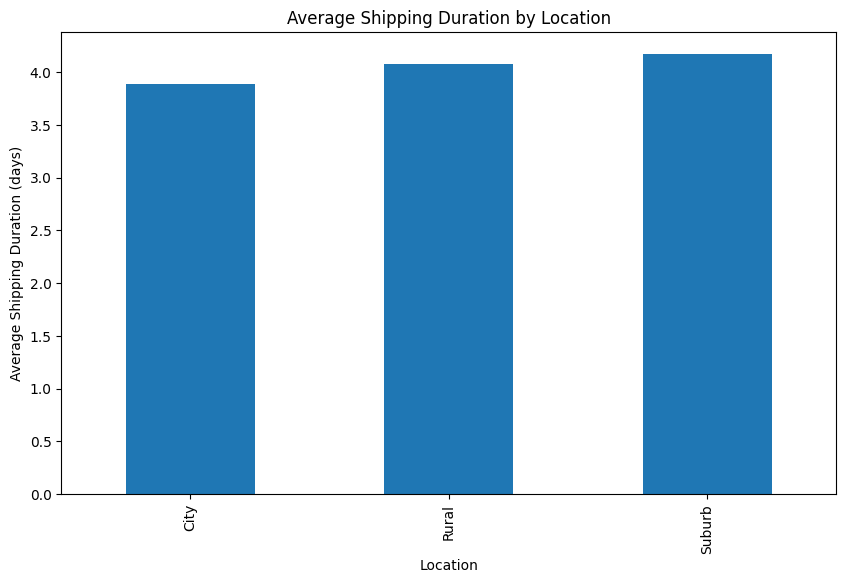

Average Shipping Duration per Location:
 Location
City      3.886628
Rural     4.081433
Suburb    4.172414
Name: ShippingDuration, dtype: float64


In [ ]:
# problem statement 9
# Average shipping duration per location
avg_shipping_duration_per_location = sales_df.groupby('Location')['ShippingDuration'].mean()
plt.figure(figsize=(10, 6))
avg_shipping_duration_per_location.plot(kind='bar')
plt.title('Average Shipping Duration by Location')
plt.ylabel('Average Shipping Duration (days)')
plt.show()

print("Average Shipping Duration per Location:\n", avg_shipping_duration_per_location)


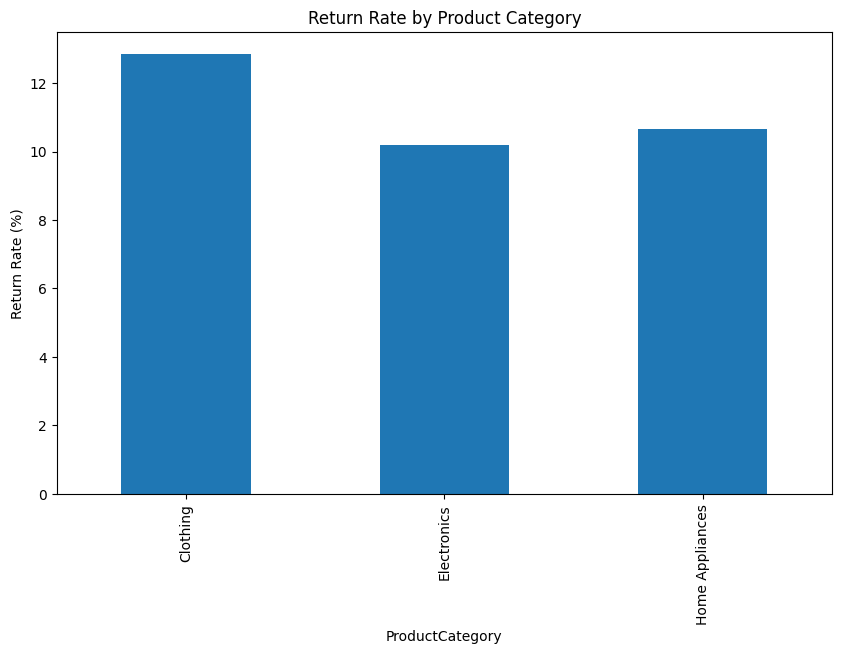

Return Rate per Product Category:
 ProductCategory
Clothing           12.852665
Electronics        10.204082
Home Appliances    10.650888
Name: IsReturned, dtype: float64


In [ ]:
# problem statement 10
# Return rate per product category
return_rate_per_category = sales_df.groupby('ProductCategory')['IsReturned'].mean() * 100
plt.figure(figsize=(10, 6))
return_rate_per_category.plot(kind='bar')
plt.title('Return Rate by Product Category')
plt.ylabel('Return Rate (%)')
plt.show()

print("Return Rate per Product Category:\n", return_rate_per_category)


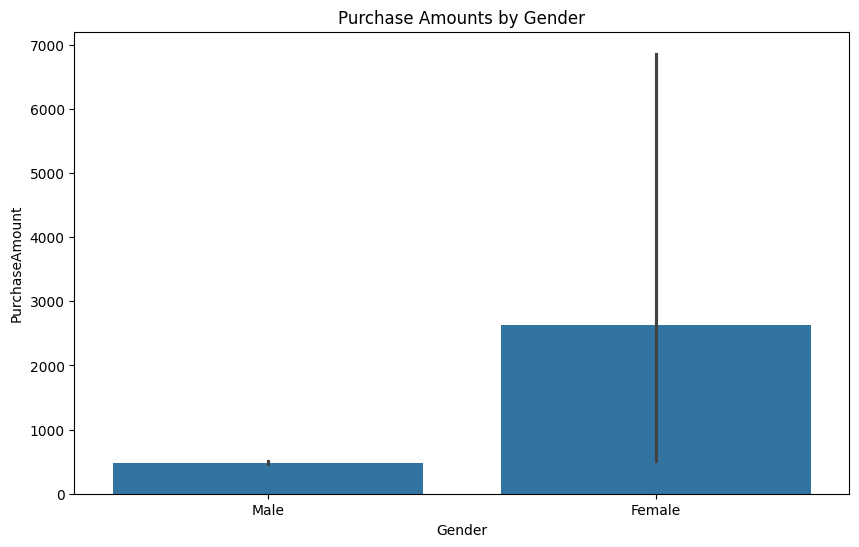

T-statistic: -1.0745905731187595, P-value: 0.28281780608324525


In [8]:
# problem statement 11
from scipy.stats import ttest_ind

# Barplot for purchase amounts by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='PurchaseAmount', data=sales_df)
plt.title('Purchase Amounts by Gender')
plt.show()

# Statistical test (t-test)
male_purchase = sales_df[sales_df['Gender'] == 'Male']['PurchaseAmount']
female_purchase = sales_df[sales_df['Gender'] == 'Female']['PurchaseAmount']
t_stat, p_value = ttest_ind(male_purchase, female_purchase)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


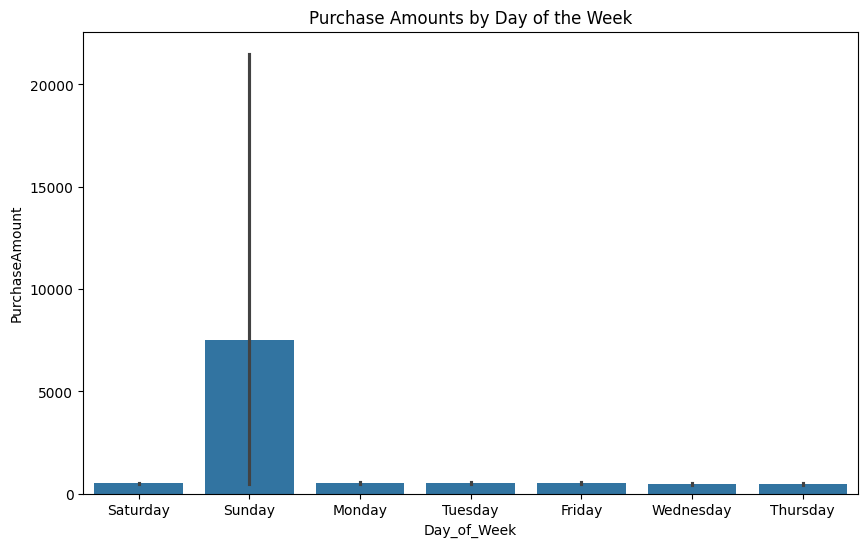

Average Purchase Amount (Weekends vs Weekdays):
 IsWeekend
False     502.140293
True     3996.016929
Name: PurchaseAmount, dtype: float64


In [9]:
# problem statement 12
# Assuming there's a 'PurchaseDate' column in the dataset
sales_df['PurchaseDate'] = pd.to_datetime(sales_df['PurchaseDate'])
sales_df['Day_of_Week'] = sales_df['PurchaseDate'].dt.day_name()

# Barplot for purchase amounts by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='PurchaseAmount', data=sales_df)
plt.title('Purchase Amounts by Day of the Week')
plt.show()

# Compare weekends vs weekdays
sales_df['IsWeekend'] = sales_df['Day_of_Week'].isin(['Saturday', 'Sunday'])
avg_purchase_weekend = sales_df.groupby('IsWeekend')['PurchaseAmount'].mean()
print("Average Purchase Amount (Weekends vs Weekdays):\n", avg_purchase_weekend)


In [27]:
#p problem statement 13
import pandas as pd
from sqlalchemy import create_engine, Column, Integer, String, Float, Date, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker

# Database connection string (using SQLite for simplicity)
db_engine = create_engine('sqlite:///sales_warehouse.db')
Base = declarative_base()

# Define the Customers table
class Customer(Base):
    __tablename__ = 'customers'
    Customer_ID = Column(Integer, primary_key=True)
    Name = Column(String)
    Age = Column(Integer)
    Gender = Column(String)
    Customer_Segment = Column(String)

# Define the Products table
class Product(Base):
    __tablename__ = 'products'
    Product_ID = Column(Integer, primary_key=True)
    Product_Name = Column(String)
    Product_Category = Column(String)
    Price = Column(Float)

# Define the Regions table
class Region(Base):
    __tablename__ = 'regions'
    Region_ID = Column(Integer, primary_key=True)
    Region_Name = Column(String)

# Define the Sales table
class Sale(Base):
    __tablename__ = 'sales'
    Sale_ID = Column(Integer, primary_key=True)
    Customer_ID = Column(Integer, ForeignKey('customers.Customer_ID'))
    Product_ID = Column(Integer, ForeignKey('products.Product_ID'))
    Purchase_Amount = Column(Float)
    Purchase_Date = Column(Date)
    Payment_Method = Column(String)
    Region = Column(String, ForeignKey('regions.Region_Name'))
    Rating = Column(Float)
    Shipping_Duration = Column(Float)

    customer = relationship('Customer')
    product = relationship('Product')
    region = relationship('Region')

# Create all tables
Base.metadata.create_all(db_engine)

# Verify the schema creation
Session = sessionmaker(bind=db_engine)
session = Session()

# Verify the tables
tables = db_engine.table_names()
print("Tables created in the database:", tables)


<ipython-input-27-203e5d366037>:9: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


AttributeError: 'Engine' object has no attribute 'table_name'

In [ ]:
# problem statement 14
# Implement the data warehouse using SQL (example using SQLite)
# Assuming transformed data is in 'transformed_sales_df'
transformed_sales_df = sales_df  # Placeholder for transformed data

engine = create_engine('sqlite:///data_warehouse.db')
transformed_sales_df.to_sql('salesfact', engine, if_exists='replace', index=False)

# Verify the data was written
query_result = pd.read_sql('SELECT * FROM salesfact LIMIT 5', engine)
print(query_result)


   Unnamed: 0  CustomerID   Age  Gender Location  ProductCategory  \
0           0           1  56.0    Male   Suburb         Clothing   
1           1           2  46.0  Female    Rural  Home Appliances   
2           2           3   NaN  Female   Suburb  Home Appliances   
3           3           4  60.0  Female   Suburb      Electronics   
4           4          10  25.0    Male   Suburb         Clothing   

                 PurchaseDate  PurchaseAmount PaymentMethod  Quantity  ...  \
0  2022-01-01 00:00:00.000000     -100.000000    Debit Card         5  ...   
1  2022-01-02 00:00:00.000000   999999.000000          Cash         5  ...   
2  2022-01-03 00:00:00.000000      955.564055    Debit Card         8  ...   
3  2022-01-04 00:00:00.000000      527.350833          Cash         9  ...   
4  2022-01-10 00:00:00.000000      306.570021   Credit Card         9  ...   

   Rating  IsPromotion  CustomerSegment  ShippingDuration Region  \
0       2            0              New         

In [26]:
# problem statement 15
import pandas as pd
from sqlalchemy import create_engine, Column, Integer, String, Float, Date, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker

# Database connection string (using SQLite for simplicity)
db_engine = create_engine('sqlite:///sales_warehouse.db')
Base = declarative_base()

# Define the Customers table
class Customer(Base):
    __tablename__ = 'customers'
    Customer_ID = Column(Integer, primary_key=True)
    Name = Column(String)
    Age = Column(Integer)
    Gender = Column(String)
    Customer_Segment = Column(String)

# Define the Products table
class Product(Base):
    __tablename__ = 'products'
    Product_ID = Column(Integer, primary_key=True)
    Product_Name = Column(String)
    Product_Category = Column(String)
    Price = Column(Float)

# Define the Regions table
class Region(Base):
    __tablename__ = 'regions'
    Region_ID = Column(Integer, primary_key=True)
    Region_Name = Column(String)

# Define the Sales table
class Sale(Base):
    __tablename__ = 'sales'
    Sale_ID = Column(Integer, primary_key=True)
    Customer_ID = Column(Integer, ForeignKey('customers.Customer_ID'))
    Product_ID = Column(Integer, ForeignKey('products.Product_ID'))
    Purchase_Amount = Column(Float)
    Purchase_Date = Column(Date)
    Payment_Method = Column(String)
    Region = Column(String, ForeignKey('regions.Region_Name'))
    Rating = Column(Float)
    Shipping_Duration = Column(Float)

    customer = relationship('Customer')
    product = relationship('Product')
    region = relationship('Region')

# Create all tables
Base.metadata.create_all(db_engine)

# Load the CSV file
file_path = '/mnt/data/Sales Dataset.csv'
df = pd.read_csv('Sales Dataset.csv')

# Data Transformation: Example transformations
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df = df.dropna()

# Establish session
Session = sessionmaker(bind=db_engine)
session = Session()

# Extract unique customers, products, and regions
customers = df[['CustomerID', 'CustomerSegment']].drop_duplicates()
products = df[['Product_ID', 'Product_Category']].drop_duplicates()
regions = df[['Region']].drop_duplicates()

# Insert data into Customers table
for _, row in customers.iterrows():
    customer = Customer(CustomerID=row['CustomerID'], CustomerSegment=row['CustomerSegment'])
    session.add(customer)

# Insert data into Products table
for _, row in products.iterrows():
    product = Product(Product_ID=row['ProductID'], Product_Category=row['ProductCategory'])
    session.add(product)

# Insert data into Regions table
for _, row in regions.iterrows():
    region = Region(Region_Name=row['Region'])
    session.add(region)

# Insert data into Sales table
for _, row in df.iterrows():
    sale = Sale(
        Customer_ID=row['Customer_ID'],
        Product_ID=row['Product_ID'],
        Purchase_Amount=row['Purchase_Amount'],
        Purchase_Date=row['Purchase_Date'],
        Payment_Method=row['Payment_Method'],
        Region=row['Region'],
        Rating=row['Rating'],
        Shipping_Duration=row['Shipping_Duration']
    )
    session.add(sale)

# Commit the session
session.commit()

# Verify the data was loaded
result = session.query(Sale).limit(5).all()
for sale in result:
    print(sale.Sale_ID, sale.Customer_ID, sale.Product_ID, sale.Purchase_Amount)

# Close the session
session.close()


<ipython-input-26-07f897210f4f>:9: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


KeyError: "None of [Index(['Product_ID', 'Product_Category'], dtype='object')] are in the [columns]"

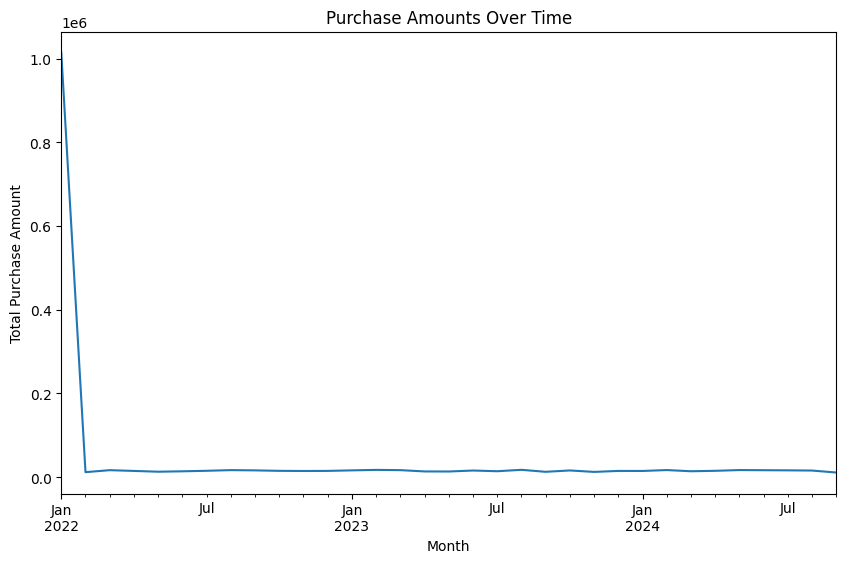

In [ ]:
#problem statement 16
# Trend of purchase amounts over the months
sales_df['Month'] = sales_df['PurchaseDate'].dt.to_period('M')
monthly_purchase_amount = sales_df.groupby('Month')['PurchaseAmount'].sum()

plt.figure(figsize=(10, 6))
monthly_purchase_amount.plot(kind='line')
plt.title('Purchase Amounts Over Time')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Month')
plt.show()


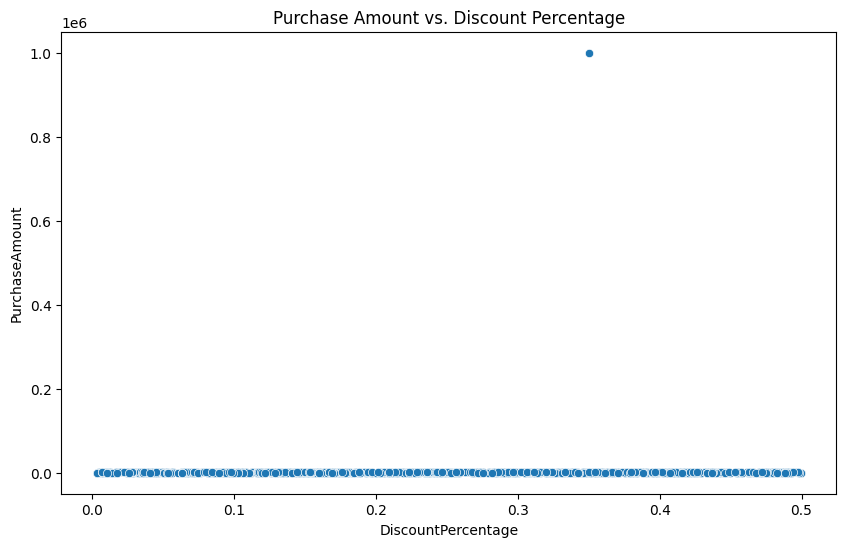

Correlation between Discount Percentage and Purchase Amount:
                     DiscountPercentage  PurchaseAmount
DiscountPercentage            1.000000        0.021557
PurchaseAmount                0.021557        1.000000


In [ ]:
#problem statement 17
# Scatter plot and correlation between purchase amount and discount percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DiscountPercentage', y='PurchaseAmount', data=sales_df)
plt.title('Purchase Amount vs. Discount Percentage')
plt.show()

correlation = sales_df[['DiscountPercentage', 'PurchaseAmount']].corr()
print("Correlation between Discount Percentage and Purchase Amount:\n", correlation)


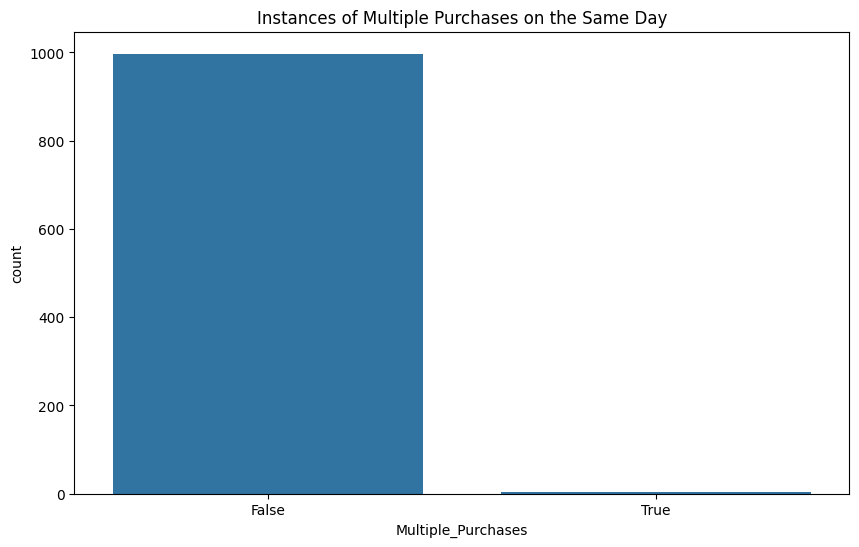

Flagged instances of multiple purchases:
    Unnamed: 0  CustomerID   Age Gender Location  ProductCategory PurchaseDate  \
4           4          10  25.0   Male   Suburb         Clothing   2022-01-10   
5           5          10  38.0   Male   Suburb  Home Appliances   2022-01-10   
9           9          10  28.0   Male     City  Home Appliances   2022-01-10   

   PurchaseAmount PaymentMethod  Quantity  ...  IsPromotion  CustomerSegment  \
4      306.570021   Credit Card         9  ...        False        Returning   
5       86.093455   Credit Card         6  ...        False        Returning   
9       59.723751    Debit Card         6  ...        False              New   

   ShippingDuration  Region          IngestionTimestamp    Source    Month  \
4               5.0   North  2024-05-31 11:52:10.267500  System A  2022-01   
5               1.0    East  2024-05-31 11:52:10.267500  System A  2022-01   
9               5.0    East  2024-05-31 11:52:10.267500  System A  2022-01   


In [ ]:
#p problem statement 18
# Flag instances of multiple purchases on the same day
sales_df['PurchaseDate'] = sales_df['PurchaseDate'].dt.date
multiple_purchases = sales_df.duplicated(subset=['CustomerID', 'PurchaseDate'], keep=False)

sales_df['Multiple_Purchases'] = multiple_purchases

plt.figure(figsize=(10, 6))
sns.countplot(x='Multiple_Purchases', data=sales_df)
plt.title('Instances of Multiple Purchases on the Same Day')
plt.show()

print("Flagged instances of multiple purchases:\n", sales_df[sales_df['Multiple_Purchases']].head())


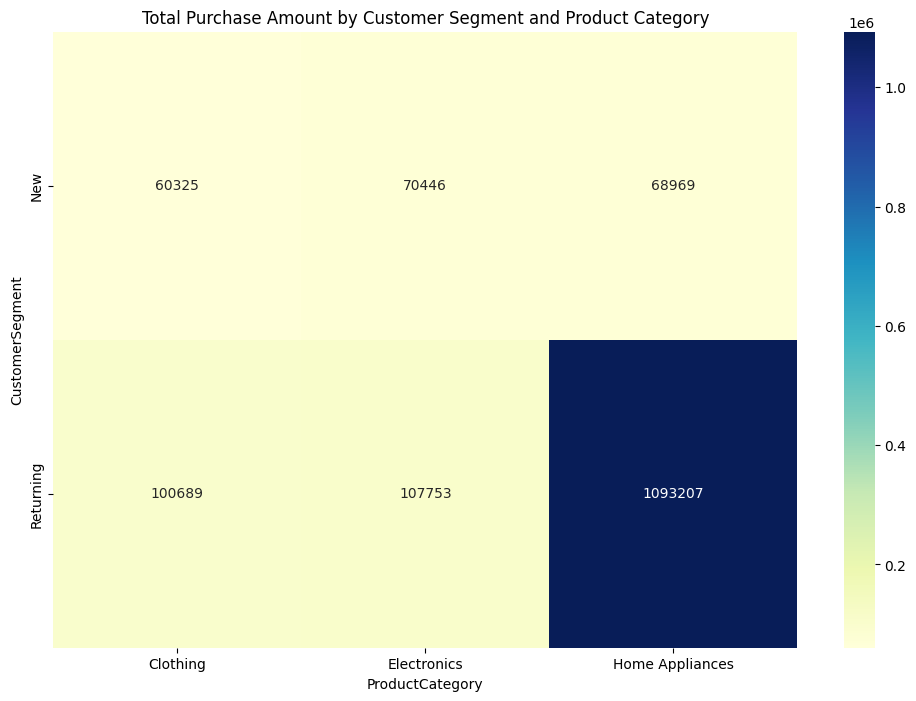

Pivot table:
 ProductCategory       Clothing    Electronics  Home Appliances
CustomerSegment                                               
New               60325.098181   70446.097719     6.896863e+04
Returning        100688.639368  107753.209241     1.093207e+06


In [ ]:
# problem statement 19
# Pivot table for total purchase amount by customer segment and product category
pivot_table = sales_df.pivot_table(values='PurchaseAmount', index='CustomerSegment', columns='ProductCategory', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Purchase Amount by Customer Segment and Product Category')
plt.show()

print("Pivot table:\n", pivot_table)


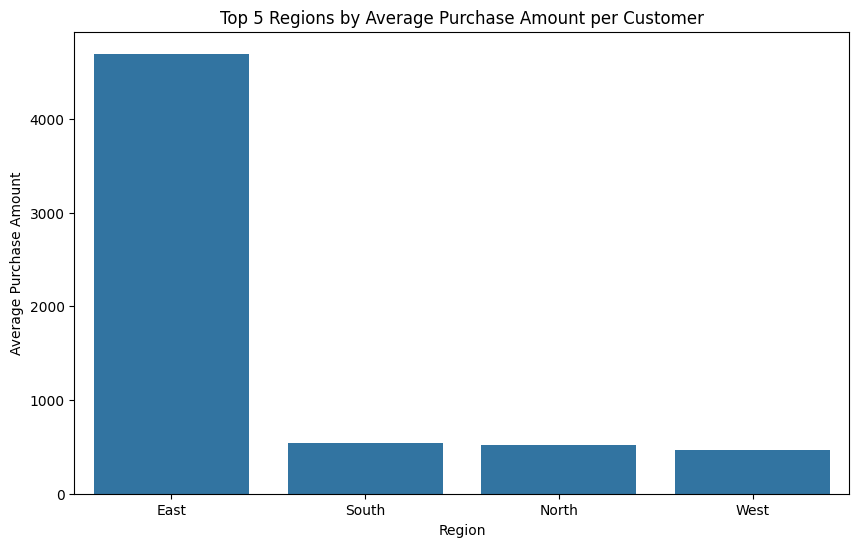

Top 5 Regions by Average Purchase Amount per Customer:
   Region  PurchaseAmount
0   East     4695.210752
2  South      543.472560
1  North      522.815889
3   West      462.694022


In [ ]:
#  problem statement 20
# Calculate the average purchase amount per customer for each region
avg_purchase_per_customer = sales_df.groupby(['Region', 'CustomerID'])['PurchaseAmount'].mean().reset_index()
avg_purchase_per_customer = avg_purchase_per_customer.groupby('Region')['PurchaseAmount'].mean().reset_index()

# Sort and display top 5 records
top_5_avg_purchase = avg_purchase_per_customer.sort_values(by='PurchaseAmount', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='PurchaseAmount', data=top_5_avg_purchase)
plt.title('Top 5 Regions by Average Purchase Amount per Customer')
plt.ylabel('Average Purchase Amount')
plt.show()

print("Top 5 Regions by Average Purchase Amount per Customer:\n", top_5_avg_purchase)
